### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load html code from ncdc website
url = 'https://covid19.ncdc.gov.ng/'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page)

In [3]:
# find all function names
names = soup.body.findAll('div',{'class': 'table-responsive'})

In [4]:
# find all 'tr' in the table body
rows = soup.find('tbody').find_all('tr')
rows

[<tr>
 <td>
                                                 Lagos
                                             </td>
 <td>58,502
                                             </td>
 <td>1,073
                                             </td>
 <td>56,990
                                             </td>
 <td>439
                                             </td>
 </tr>,
 <tr>
 <td>
                                                 FCT
                                             </td>
 <td>19,790
                                             </td>
 <td>527
                                             </td>
 <td>19,097
                                             </td>
 <td>166
                                             </td>
 </tr>,
 <tr>
 <td>
                                                 Kaduna
                                             </td>
 <td>9,061
                                             </td>
 <td>14
                                             </td>
 <td>8,982
     

In [5]:
# print the values in the 'td' tag 
df= {} # create a dictionary
df_no = 0 # set the rows to 0

for row in rows: # iterate through the rows, find all values in the 'td' tag and strip
    table = row.find_all('td')
    a = table[0].text.strip()
    b = table[1].text.strip()
    c = table[2].text.strip()
    d = table[3].text.strip()
    e = table[4].text.strip()
    
    df_no+=1
    df[df_no] = [a,b,c,d,e]
    print('a:',a ,'\nb:',b,'\nc:',c,'\nd:',d,'\ne:',e ) # print
    

a: Lagos 
b: 58,502 
c: 1,073 
d: 56,990 
e: 439
a: FCT 
b: 19,790 
c: 527 
d: 19,097 
e: 166
a: Kaduna 
b: 9,061 
c: 14 
d: 8,982 
e: 65
a: Plateau 
b: 9,059 
c: 15 
d: 8,987 
e: 57
a: Rivers 
b: 7,115 
c: 8 
d: 7,006 
e: 101
a: Oyo 
b: 6,852 
c: 7 
d: 6,721 
e: 124
a: Edo 
b: 4,904 
c: 5 
d: 4,714 
e: 185
a: Ogun 
b: 4,679 
c: 39 
d: 4,591 
e: 49
a: Kano 
b: 3,961 
c: 23 
d: 3,828 
e: 110
a: Ondo 
b: 3,248 
c: 1,105 
d: 2,080 
e: 63
a: Kwara 
b: 3,123 
c: 6 
d: 3,062 
e: 55
a: Delta 
b: 2,623 
c: 808 
d: 1,744 
e: 71
a: Osun 
b: 2,578 
c: 13 
d: 2,513 
e: 52
a: Enugu 
b: 2,401 
c: 359 
d: 2,013 
e: 29
a: Nasarawa 
b: 2,382 
c: 1,996 
d: 373 
e: 13
a: Katsina 
b: 2,097 
c: 14 
d: 2,049 
e: 34
a: Gombe 
b: 2,034 
c: 4 
d: 1,986 
e: 44
a: Ebonyi 
b: 2,030 
c: 33 
d: 1,965 
e: 32
a: Anambra 
b: 1,909 
c: 64 
d: 1,826 
e: 19
a: Akwa Ibom 
b: 1,864 
c: 20 
d: 1,830 
e: 14
a: Abia 
b: 1,690 
c: 10 
d: 1,658 
e: 22
a: Imo 
b: 1,657 
c: 28 
d: 1,592 
e: 37
a: Bauchi 
b: 1,549 
c: 14 
d: 1,518

In [6]:
# confirm the total number of rows
print('Total:', df_no)

Total: 37


In [7]:
# Save the data to a DataFrame object
ncdc_df = pd.DataFrame.from_dict(df, orient='index')

In [8]:
# print first five rows of the data
ncdc_df.head() 

,0,1,2,3,4
1,Lagos,"58,502","1,073","56,990",439
2,FCT,"19,790",527,"19,097",166
3,Kaduna,"9,061",14,"8,982",65
4,Plateau,"9,059",15,"8,987",57
5,Rivers,"7,115",8,"7,006",101


In [9]:
# save df as csv file
ncdc_df.to_csv('ncdc_covid')

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [10]:
# saving data from the GitHub repo link to dataframe
gdconfirmed_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true')
gdrecovered_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv?raw=true')
gddeath_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true')

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [11]:
# save external data to dataframe
external_df = pd.read_csv('covid_external.csv')
budget_df = pd.read_csv('Budget data.csv')
gdp_df = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [12]:
# inspect all data by obtaining info(), head() and shape information 
# scraped ncdc data
print('Data summary:','\n', ncdc_df.info(), '\n', 'First 5 rows:','\n' ,ncdc_df.head(),  '\n', 
      'Total rows and columns:', ncdc_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       37 non-null     object
 1   1       37 non-null     object
 2   2       37 non-null     object
 3   3       37 non-null     object
 4   4       37 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB
Data summary: 
 None 
 First 5 rows: 
          0       1      2       3    4
1    Lagos  58,502  1,073  56,990  439
2      FCT  19,790    527  19,097  166
3   Kaduna   9,061     14   8,982   65
4  Plateau   9,059     15   8,987   57
5   Rivers   7,115      8   7,006  101 
 Total rows and columns: (37, 5)


* No missing values in the scraped data
* It has 37 rows and 5 columns
* All datatypes are in the Object form

In [13]:
# global daily confirmed cases
print('Data summary:','\n', gdconfirmed_df.info(),'\n','First 5 rows:','\n', gdconfirmed_df.head(),'\n',  
      'Total rows and columns:', gdconfirmed_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 472 entries, Province/State to 5/3/21
dtypes: float64(2), int64(468), object(2)
memory usage: 1014.2+ KB
Data summary: 
 None 
 First 5 rows: 
   Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/24/21  4/25/21  4/26/21  \
0        0        0        0        0  ...    58730    58843    59015   
1        0        0        0        0  ...   130409   130537   130606   
2        0        0        0        0  ...   120736   120922   121112   
3        0        0        0        0 

* No missing values in the global daily confirmed cases data
* It has 275 rows and 469 columns
* There are 2 float datatypes, 456 integers and 2 objects.

In [14]:
# global daily recovered cases 
print('Data summary:','\n', gdrecovered_df.info(),'\n','First 5 rows:','\n', gdrecovered_df.head(),'\n',  
      'Total rows and columns:', gdrecovered_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 472 entries, Province/State to 5/3/21
dtypes: float64(2), int64(468), object(2)
memory usage: 958.9+ KB
Data summary: 
 None 
 First 5 rows: 
   Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/24/21  4/25/21  4/26/21  \
0        0        0        0        0  ...    52392    52489    52520   
1        0        0        0        0  ...   105016   105728   106465   
2        0        0        0        0  ...    84167    84299    84440   
3        0        0        0        0  

* No missing values in the global daily recovered cases data
* It has 260 rows and 469 columns
* There are 2 float datatypes, 456 integers and 2 objects.

In [15]:
# global daily death cases
print('Data summary:','\n', gddeath_df.info(),'\n', 'First 5 rows:','\n', gddeath_df.head(),'\n', 
      'Total rows and columns:', gddeath_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 472 entries, Province/State to 5/3/21
dtypes: float64(2), int64(468), object(2)
memory usage: 1014.2+ KB
Data summary: 
 None 
 First 5 rows: 
   Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/24/21  4/25/21  4/26/21  \
0        0        0        0        0  ...     2572     2582     2592   
1        0        0        0        0  ...     2372     2378     2379   
2        0        0        0        0  ...     3198     3207     3217   
3        0        0        0        0 

* No missing values in the global daily death cases data
* It has 275 rows and 469 columns
* There are 2 float datatypes, 456 integers and 2 objects.

In [16]:
# covid external data
print('Data summary:','\n', external_df.info(),'\n', 'First 5 rows:','\n', external_df.head(),'\n', 
      'Total rows and columns:', external_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB
Data summary: 
 None 
 First 5 rows: 
       states         region  Population 

* No missing values in the external data
* It has 37 rows and 12 columns
* There are 9 float datatypes, 1 integer and 2 objects.

In [17]:
# budget data
print('Data summary:','\n', budget_df.info(),'\n', 'First 5 rows:','\n', budget_df.head(),'\n', 
      'Total rows and columns:', budget_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
Data summary: 
 None 
 First 5 rows: 
       states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00 
 Total rows and columns: (37, 3)


* No missing values in the budget data
* It has 37 rows and 3 columns
* There are 2 float and 1 object datatypes.

In [18]:
# real GDP
print('Data summary:','\n', gdp_df.info(),'\n', 'First 5 rows:','\n', gdp_df.head(),'\n', 
      'Total rows and columns:', gdp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
Data summary: 
 None 
 First 5 rows: 
    Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59 
 Total rows and columns: (7, 5)


* No missing values in the real GDP data
* It has 7 rows and 5 columns
* There are 4 float and 1 integer datatypes.

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

All columns are in their right datatype format except the ncdc scraped data columns

In [19]:
# convert columns to appropriate datatypes and remove comma from numerical columns
ncdc_df[1] = ncdc_df[1].str.replace(",","").astype(int)
ncdc_df[2] = ncdc_df[2].str.replace(",","").astype(int)
ncdc_df[3] = ncdc_df[3].str.replace(",","").astype(int)
ncdc_df[4] = ncdc_df[4].str.replace(",","").astype(int)

In [20]:
# confirm datatype format
ncdc_df.dtypes

0    object
1     int64
2     int64
3     int64
4     int64
dtype: object

In [21]:
# rename the columns
ncdc_df = ncdc_df.rename(columns={0:'states',1:'no_lab_confirmed_cases',2:'no_cases_on_admission',
                               3:'no_discharged', 4:'no_of_deaths'})

In [22]:
ncdc_df.head()

,states,no_lab_confirmed_cases,no_cases_on_admission,no_discharged,no_of_deaths
1,Lagos,58502,1073,56990,439
2,FCT,19790,527,19097,166
3,Kaduna,9061,14,8982,65
4,Plateau,9059,15,8987,57
5,Rivers,7115,8,7006,101


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [23]:
# create a list of columns to drop
cols_to_drop = ['Province/State', 'Lat', 'Long', 'Country/Region']

In [24]:
# daily confirmed cases in nigeria
gdconfirmed_df_ng = gdconfirmed_df.loc[gdconfirmed_df['Country/Region'] =='Nigeria']
gdconfirmed_df_ng.drop(columns = cols_to_drop, axis=1, inplace=True)

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [25]:
# daily recovered cases in nigeria
gdrecovered_df_ng = gdrecovered_df.loc[gdrecovered_df['Country/Region'] =='Nigeria']
gdrecovered_df_ng.drop(columns = cols_to_drop, axis=1, inplace=True)

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [26]:
# daily death cases in nigeria
gddeath_df_ng = gddeath_df.loc[gddeath_df['Country/Region'] =='Nigeria']
gddeath_df_ng.drop(columns = cols_to_drop, axis=1, inplace=True)

In [27]:
gddeath_df_ng

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
200,0,0,0,0,0,0,0,0,0,0,...,2061,2062,2062,2063,2063,2063,2063,2063,2063,2063


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

<AxesSubplot:xlabel='states'>

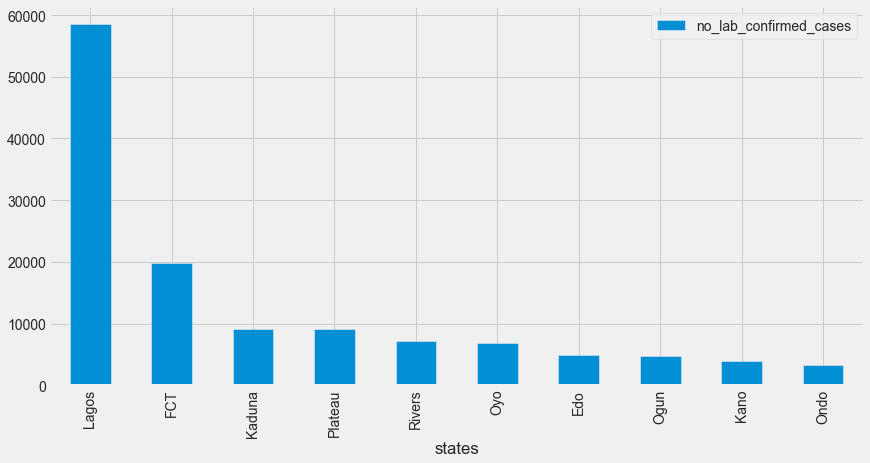

In [28]:
# top 10 states in terms of confirmed covid cases by laboratory test
ncdc_df[:10].sort_values(by=['no_lab_confirmed_cases'],ascending=False).plot('states','no_lab_confirmed_cases',kind='bar',figsize=(13,6.5))

Lagos is the top state with confirmed COVID cases by laboratory test. The top 10 states are shown in the graph above.

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

<AxesSubplot:xlabel='states'>

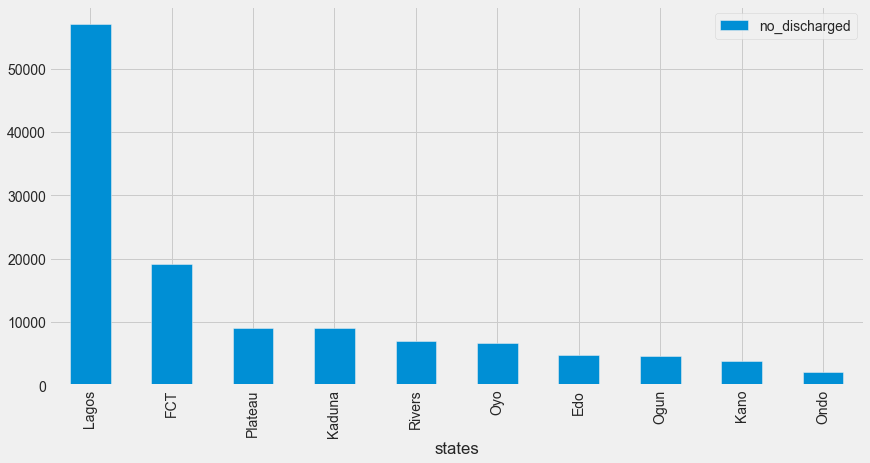

In [29]:
# top 10 states in terms of discharged covid cases
ncdc_df[:10].sort_values(by=['no_discharged'],ascending=False).plot('states','no_discharged',kind='bar',figsize=(13,6.5))

Lagos state also owns the highest discharged COVID cases with over 50000 discharged patients,followed by FCT with slight close to 20000 patients and so on down to Ondo state making the 10th from the chart.

TODO D - Plot the top 10 Death cases

<AxesSubplot:xlabel='states'>

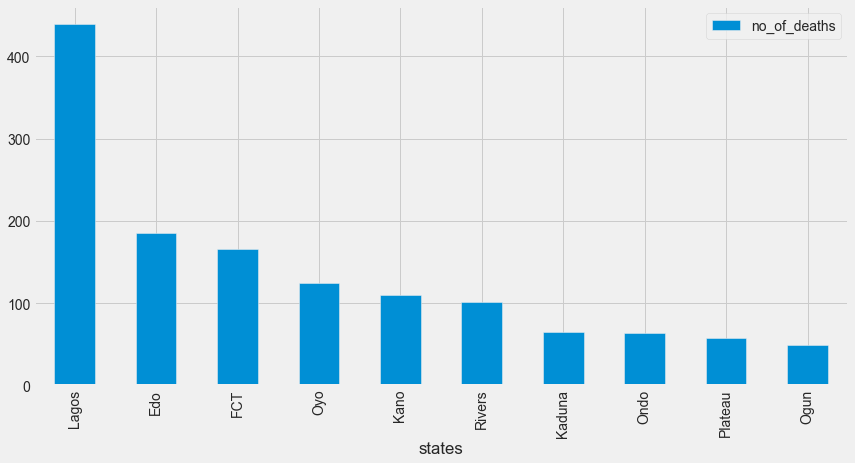

In [30]:
# top 10 death cases
ncdc_df[:10].sort_values(by=['no_of_deaths'],ascending=False).plot('states','no_of_deaths',kind='bar',figsize=(13,6.5))

Lagos, Edo, FCT, Oyo, Kano, Rivers, Kaduna, Ondo, Plateau and Ogun are the top 10 states with recorded death cases. The chart above shows the number of each state.

<AxesSubplot:xlabel='states'>

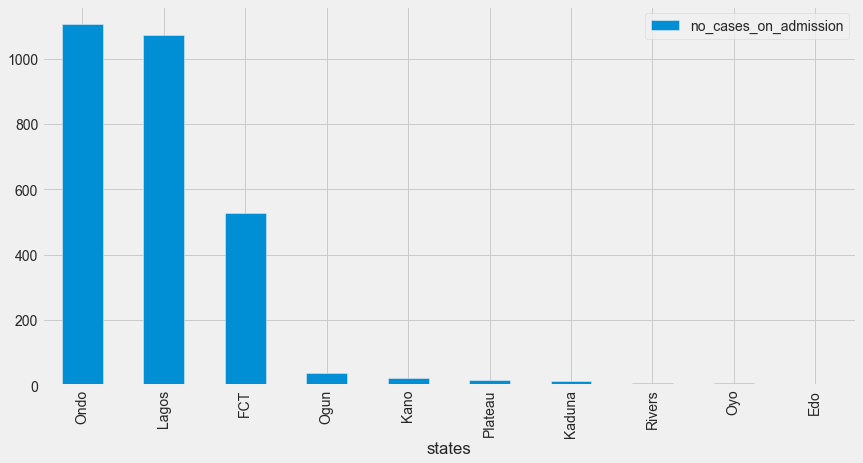

In [31]:
# top 10 states in terms of covid cases on admission
ncdc_df[:10].sort_values(by=['no_cases_on_admission'],ascending=False).plot('states','no_cases_on_admission',kind='bar',figsize=(13,6.5))

The chart shows top 10 states in terms of COVID cases on admission. Ondo tops this list with over 1000 admitted patients, followed by Lagos, FCT etc. with approximately 1000 and over 400 patients accordingly. Other states have below 200 cases.

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [32]:
# transpose the daiky cases data in Nigeria
gdconfirmed_df_ng = gdconfirmed_df_ng.set_index('1/22/20').T
gdrecovered_df_ng = gdrecovered_df_ng.set_index('1/22/20').T
gddeath_df_ng = gddeath_df_ng.set_index('1/22/20').T

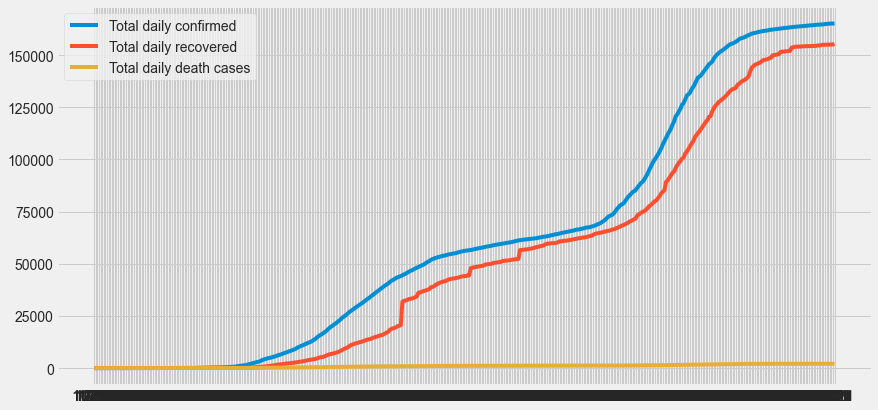

In [33]:
# line plot for the total daily confirmed, recovered and death cases in Nigeria
plt.figure(figsize=(13, 6.5))
plt.plot(gdconfirmed_df_ng, label = 'Total daily confirmed')
plt.plot(gdrecovered_df_ng, label = 'Total daily recovered')
plt.plot(gddeath_df_ng, label = 'Total daily death cases')
plt.legend() 
plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [34]:
# daily infection rate
daily_infection_rate = gdconfirmed_df_ng.diff()
daily_infection_rate

1/22/20,0
1/23/20,NaN
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
1/27/20,0.0
...,...
4/29/21,62.0
4/30/21,55.0
5/1/21,0.0
5/2/21,43.0


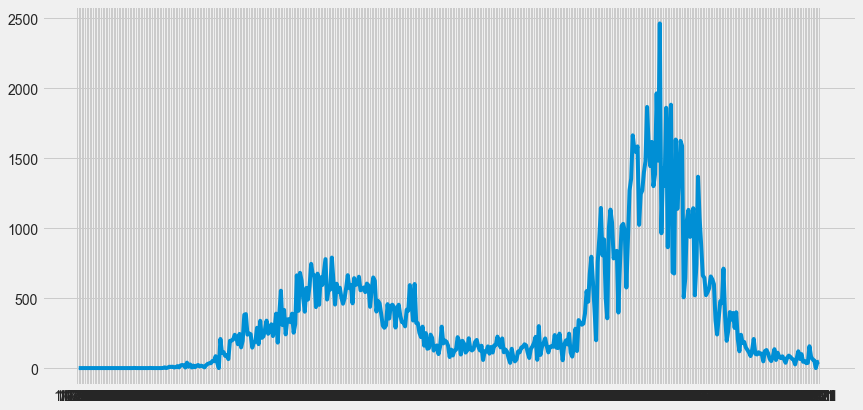

In [35]:
plt.figure(figsize=(13, 6.5))
plt.plot(daily_infection_rate)

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [36]:
daily_infection_rate.max()

1/22/20
0    2464.0
dtype: float64

The maximum infection rate for a day (Number of new cases) is 2464

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [37]:
# combine the ncdc and external covid dataset on column 'state'
new_df = pd.merge(ncdc_df, external_df, on=['states'])
new_df.head() # view combined df

,states,no_lab_confirmed_cases,no_cases_on_admission,no_discharged,no_of_deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58502,1073,56990,439,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19790,527,19097,166,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9061,14,8982,65,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9059,15,8987,57,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7115,8,7006,101,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00


In [38]:
# top_10 states with confirmed cases
top10_new_df = new_df.nlargest(10,['no_lab_confirmed_cases'])

In [39]:
plot_merge = top10_new_df[['states', 'no_lab_confirmed_cases','Overall CCVI Index']]
plot_merge

,states,no_lab_confirmed_cases,Overall CCVI Index
0,Lagos,58502,0.0
1,FCT,19790,0.3
2,Kaduna,9061,0.7
3,Plateau,9059,0.4
4,Rivers,7115,0.4
5,Oyo,6852,0.2
6,Edo,4904,0.1
7,Ogun,4679,0.3
8,Kano,3961,0.6
9,Ondo,3248,0.1


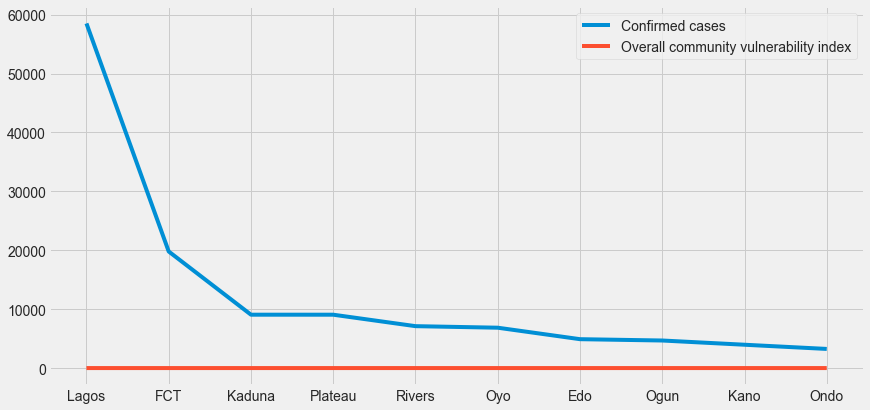

In [40]:
# generate the line plot
plt.figure(figsize=(13, 6.5))
x = plot_merge['states']
y1 = plot_merge['no_lab_confirmed_cases']
y2 = plot_merge['Overall CCVI Index']

plt.plot(x, y1, x, y2)
plt.legend(['Confirmed cases', 'Overall community vulnerability index'])

The vulnerability index of each state is a little above 0. It is not affected by the number of confirmed cases.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='no_lab_confirmed_cases', ylabel='Population Density'>

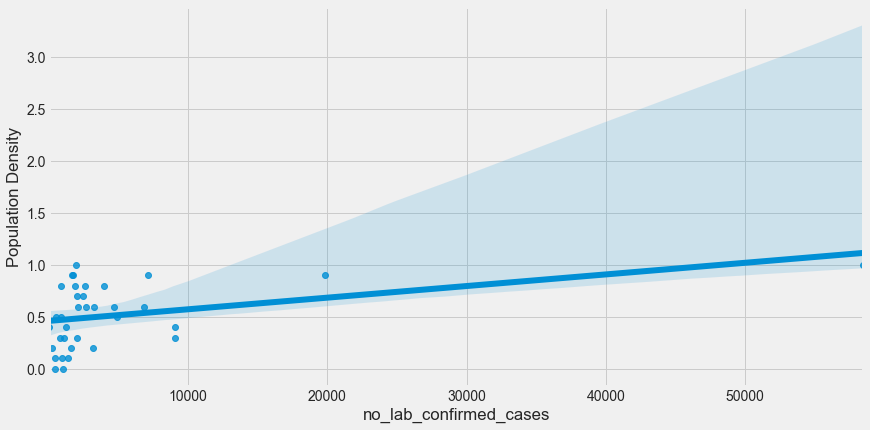

In [41]:
plt.figure(figsize=(13, 6.5))
sns.regplot(x=new_df['no_lab_confirmed_cases'], y =new_df['Population Density'])

The relationship between the Population density and confirmed cases from the graph above doesn't follow a linear relation and is clustered when Confirmed cases is below 10000 but very disperse above 10000 cases.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [42]:
daily_infection_rate.min() # minimum infection rate

1/22/20
0    0.0
dtype: float64

The minimum daily infection rate is 0

In [43]:
# top 10 states in terms of number of discharged cases. 
top10_new_df2 = new_df.nlargest(10,['no_discharged'])

In [44]:
plot_merge2 = top10_new_df2[['states', 'no_discharged','Health System']]

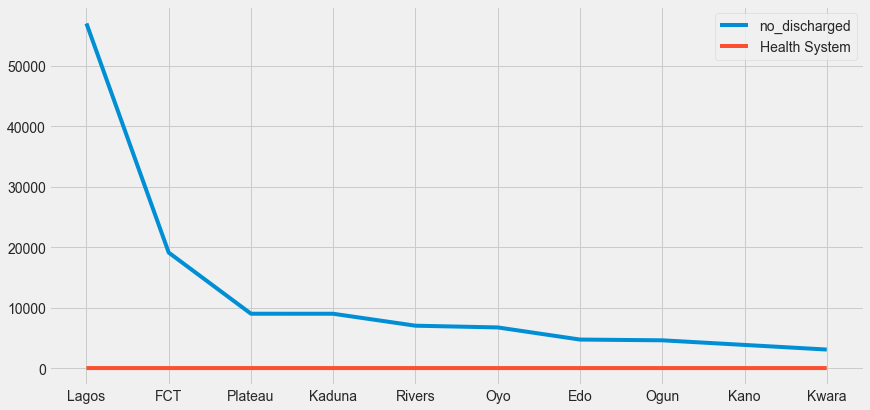

In [45]:
# generate the line plot
plt.figure(figsize=(13, 6.5))
x = plot_merge2['states']
y1 = plot_merge2['no_discharged']
y2 = plot_merge2['Health System']

plt.plot(x, y1, x, y2)
plt.legend(['no_discharged', 'Health System'])

The Health system of the top 10 number of discharged states is a little above 0. It is not affected by the number of discharged patients.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [46]:
# create a plot dataframe
df = pd.melt(gdp_df, id_vars=['Year'], var_name='Quartile', value_name='Value')

df.head(10)

,Year,Quartile,Value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


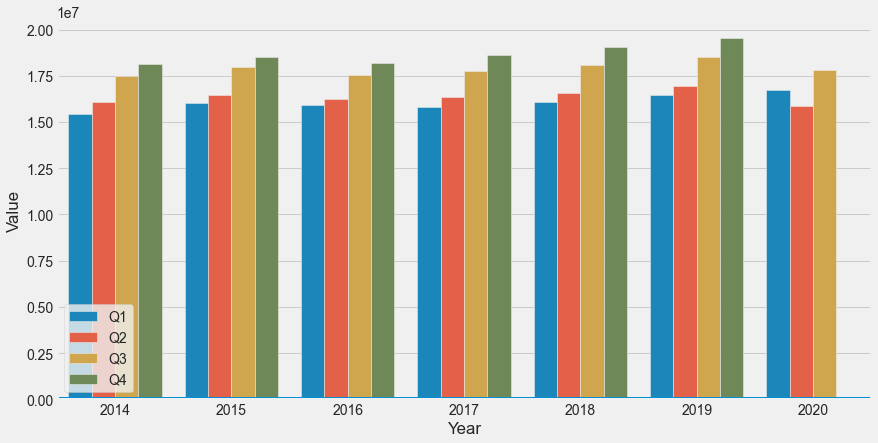

In [47]:
plt.figure(figsize=(13, 6.5))
ax = sns.barplot(data=df, x='Year',y='Value', hue='Quartile')
plt.axhline(y=1.58) #horizontal line through Q2 2020
plt.legend(loc='lower left') # set legend position to lower left

The values increases by each quarter for every year, except 2020 where the first quartile is grater than the second. Also, it does not contain a Q4; it is at 0.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

Analyse on external dataset gdp and budget

In [48]:
# print first 5 rows of the budget data for analysis
budget_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


* Create a line plot of the initial and revised budgets on the same graph.

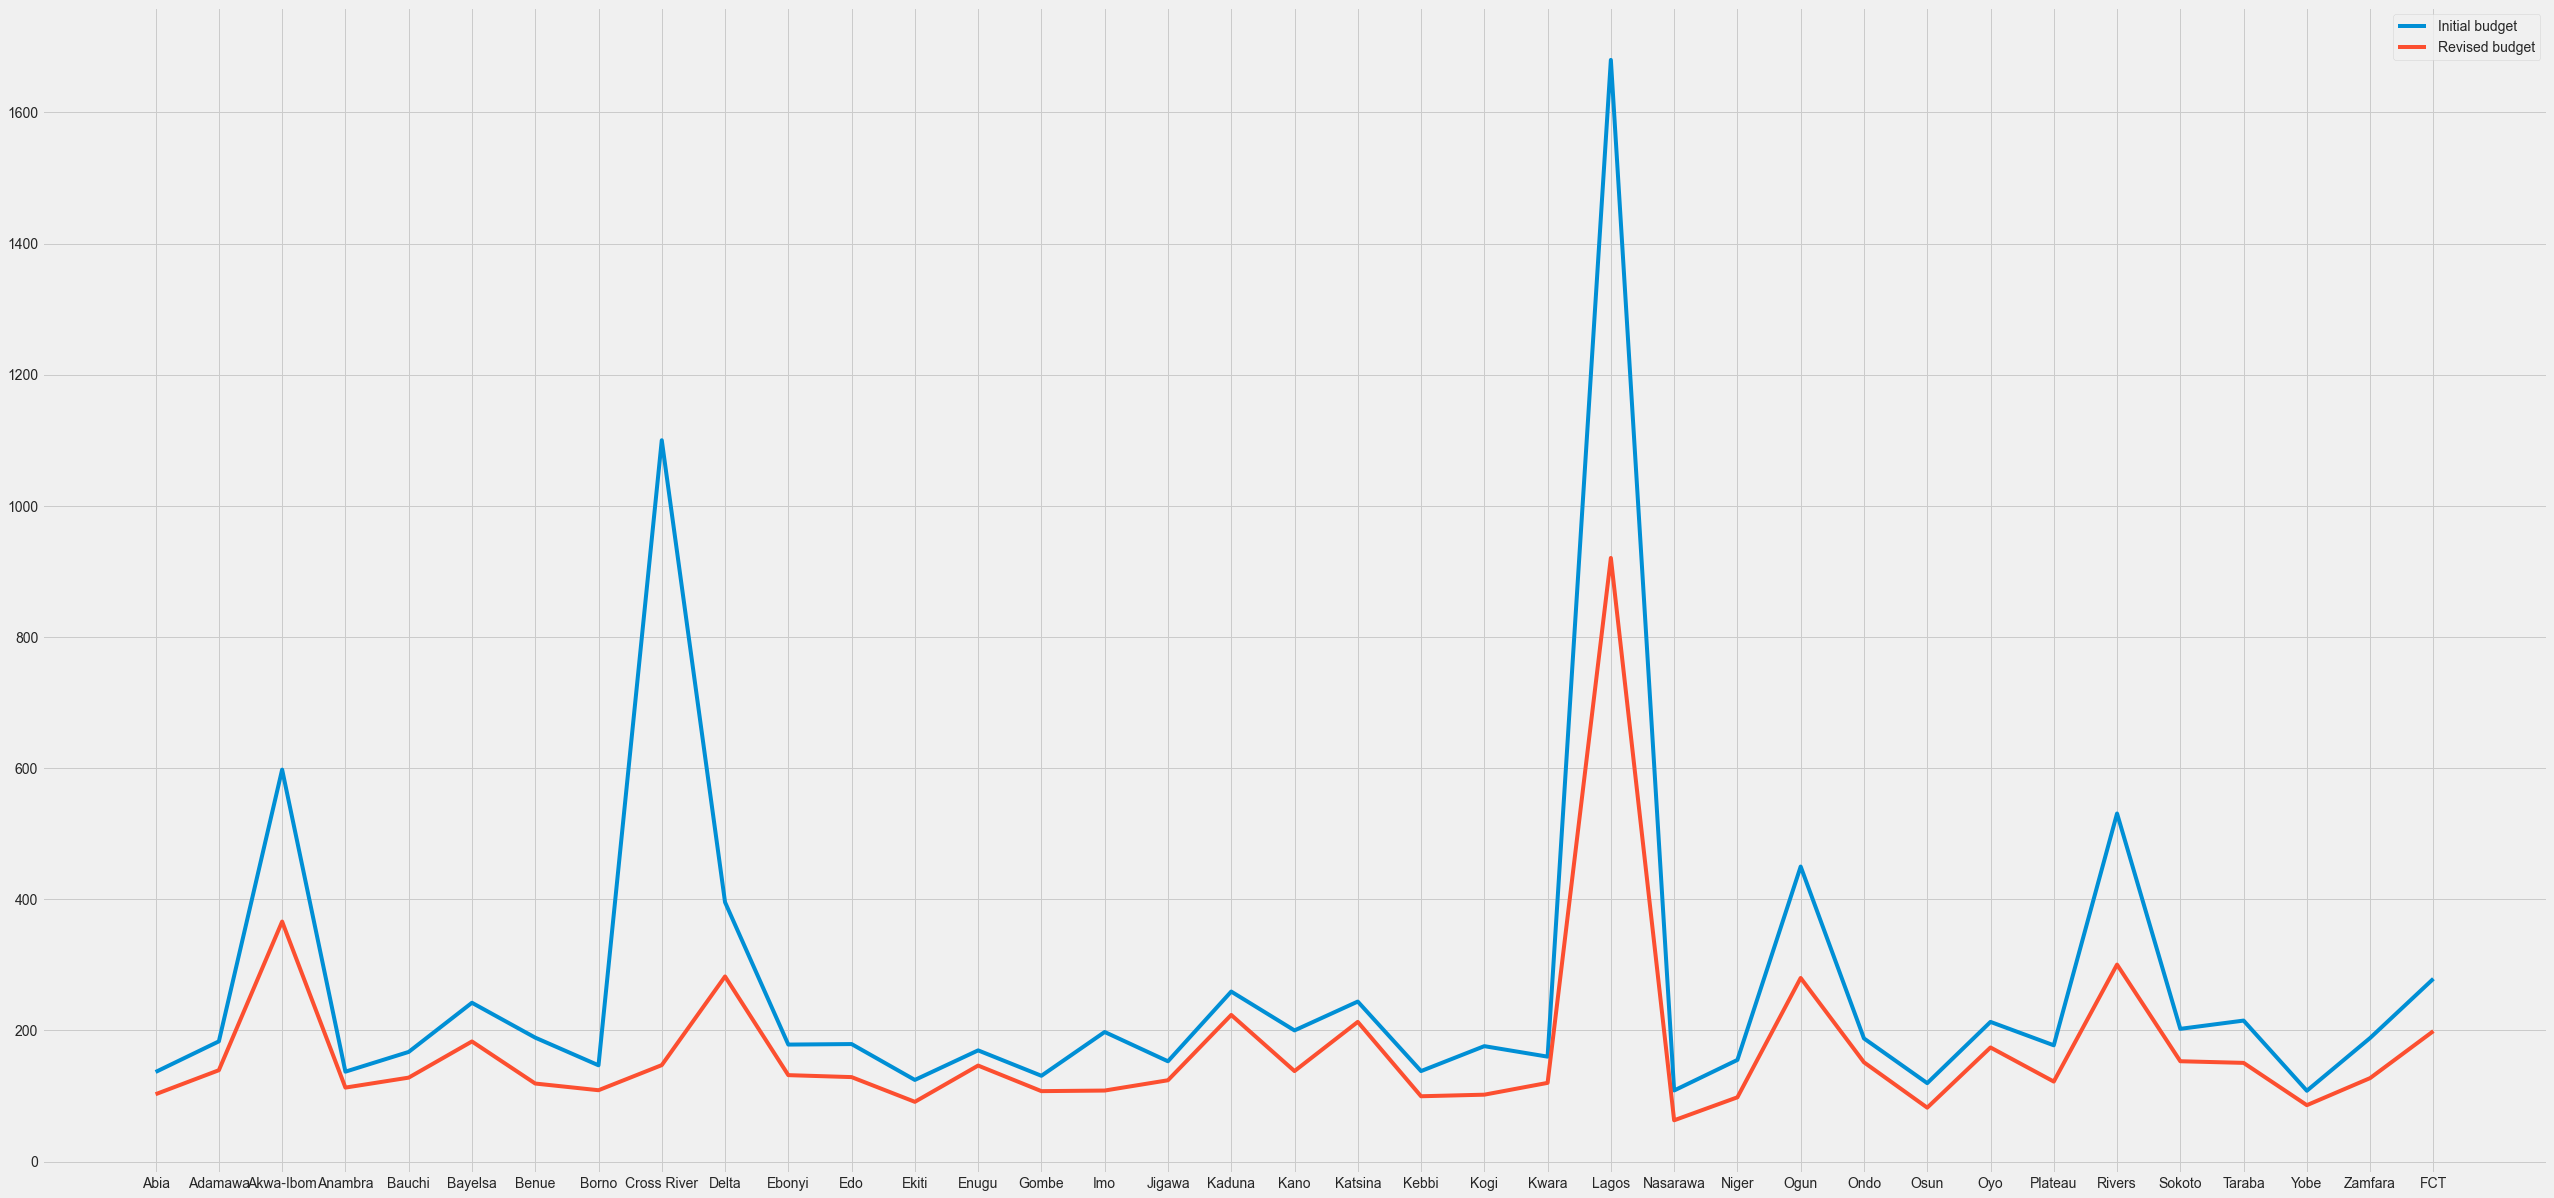

In [49]:
# generate the line plot
plt.figure(figsize=(40, 20))
x = budget_df['states']
y1 = budget_df['Initial_budget (Bn)']
y2 = budget_df['Revised_budget (Bn)']

plt.plot(x, y1, x, y2)
plt.legend(['Initial budget', 'Revised budget'])

Lagos has the highest initial budget of over 1600.

* Check for trend between Q1 and Q4 using line plots.

<AxesSubplot:xlabel='Year', ylabel='Q1'>

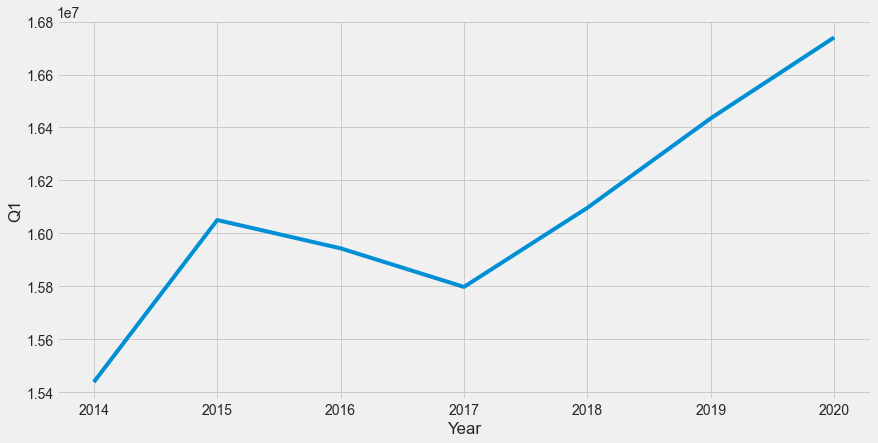

In [50]:
# first quartile
plt.figure(figsize=(13, 6.5))
sns.lineplot(x='Year',y='Q1', data=gdp_df)

<AxesSubplot:xlabel='Year', ylabel='Q4'>

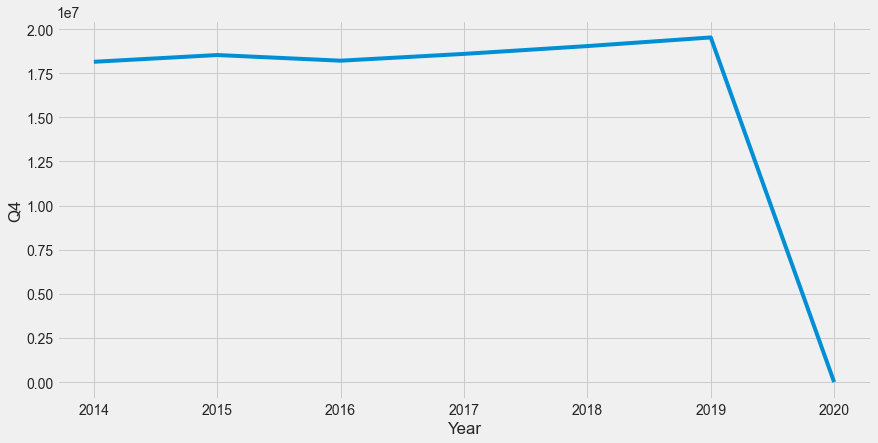

In [51]:
# fourth quartile
plt.figure(figsize=(13, 6.5))
sns.lineplot(x='Year',y='Q4', data=gdp_df)

The fourth quartile in 2020 is at 0

* Use seaborn stripplot to get the number of lab confirmed cases according to their regions

<AxesSubplot:xlabel='region', ylabel='no_lab_confirmed_cases'>

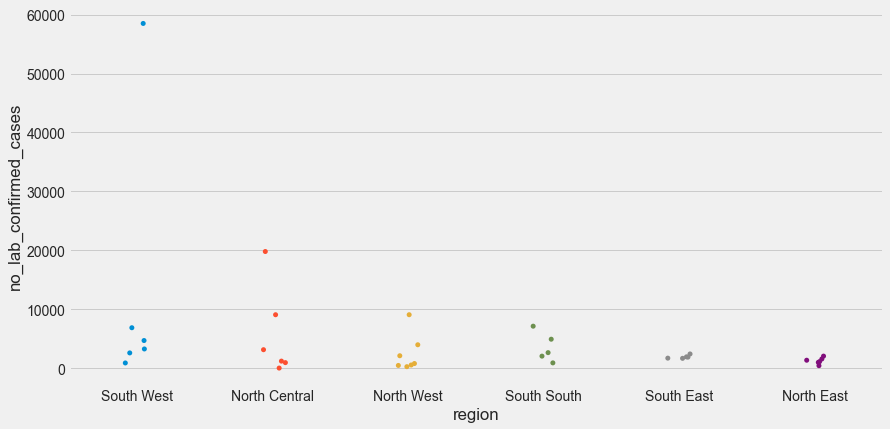

In [52]:
plt.figure(figsize=(13, 6.5))
sns.stripplot(x=new_df['region'],y=new_df['no_lab_confirmed_cases'])

South west region has the highest number of laboratory confirmed cases.

* Using the seaborn catplot, visualize the number of death in each regions

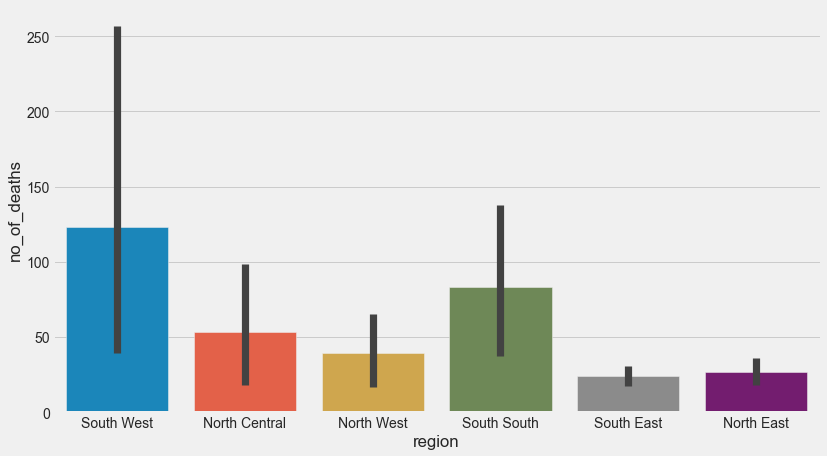

In [53]:
g = sns.catplot(x='region', y='no_of_deaths', kind='bar', data=new_df)
g.fig.set_figwidth(13)
g.fig.set_figheight(6.5)

The South west has the highest with over 400 deaths, followed by the South south, North central, North west, North east and then South east regions.

* Combine the budget and external covid dataset together on a common column(states)

In [54]:
# combine both dataset
external_budget = pd.merge(budget_df, external_df, on=['states'])
external_budget.head() # view combined df

,states,Initial_budget (Bn),Revised_budget (Bn),region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Abia,136.60,102.70,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
1,Adamawa,183.30,139.31,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
2,Anambra,137.10,112.80,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08
3,Bauchi,167.20,128.00,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
4,Bayelsa,242.18,183.15,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00


* Use a barplot to find the total initial and revised budget of each region

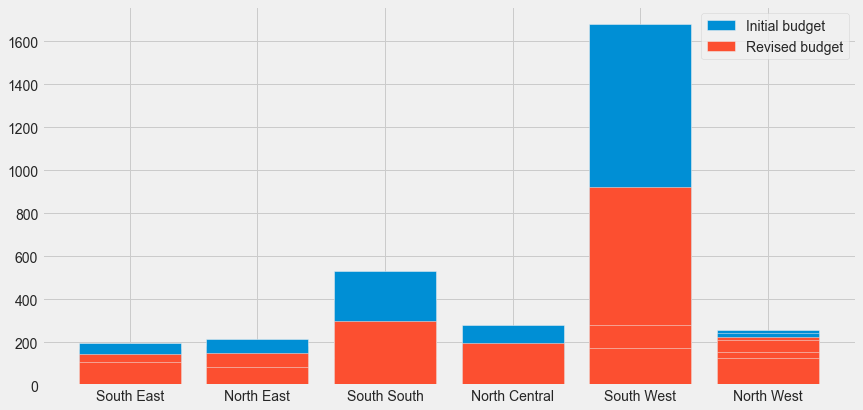

In [55]:
plt.figure(figsize=(13, 6.5))
plt.bar(external_budget['region'],external_budget['Initial_budget (Bn)'], label='Initial budget')
plt.bar(external_budget['region'],external_budget['Revised_budget (Bn)'], label='Revised budget')
plt.legend()

 The South south has an almost balance  initial and revised budgets. 

**More external dataset importation**

In [56]:
# read dataset
owid = pd.read_csv('owid-covid-data.csv')
owid.head() # view first 5 rows

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [58]:
# Get a Pandas DataFrame for Cases in Nigeria
owid_ng = owid.loc[owid['location'] =='Nigeria']
owid_ng.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
55626,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539
55627,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539
55628,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539
55629,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539
55630,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539


In [59]:
# data summary
owid_ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 55626 to 56053
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               428 non-null    object 
 1   continent                              428 non-null    object 
 2   location                               428 non-null    object 
 3   date                                   428 non-null    object 
 4   total_cases                            428 non-null    float64
 5   new_cases                              428 non-null    float64
 6   new_cases_smoothed                     423 non-null    float64
 7   total_deaths                           404 non-null    float64
 8   new_deaths                             404 non-null    float64
 9   new_deaths_smoothed                    423 non-null    float64
 10  total_cases_per_million                428 non-null    float64
 11  

In [60]:
# create a list of columns to drop
to_drop = ['new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
          'new_cases_per_million','new_cases_smoothed_per_million', 'reproduction_rate',
          'icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
          'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
          'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
          'new_tests_smoothed','new_tests_smoothed_per_thousand','positive_rate','tests_per_case',
          'people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred',
          'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
          'new_vaccinations_smoothed_per_million','stringency_index','extreme_poverty','hospital_beds_per_thousand',
          'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','tests_units']

In [61]:
owid_ng.drop(columns = to_drop, axis=1, inplace=True)

In [62]:
#view summary again
owid_ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 55626 to 56053
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 428 non-null    object 
 1   continent                428 non-null    object 
 2   location                 428 non-null    object 
 3   date                     428 non-null    object 
 4   total_cases              428 non-null    float64
 5   new_cases                428 non-null    float64
 6   total_deaths             404 non-null    float64
 7   new_tests                162 non-null    float64
 8   total_tests              228 non-null    float64
 9   total_vaccinations       21 non-null     float64
 10  people_vaccinated        21 non-null     float64
 11  population               428 non-null    float64
 12  population_density       428 non-null    float64
 13  median_age               428 non-null    float64
 14  aged_65_older       

In [64]:
# convert the date column datatype
owid_ng['date']= pd.to_datetime(owid_ng['date'])

In [65]:
# convert total cases column to integer
owid_ng['total_cases'] = owid_ng['total_cases'].astype(int)

In [66]:
# create new features from the date column
owid_ng['year'] = owid_ng.date.dt.year
owid_ng['month'] = owid_ng.date.dt.month
owid_ng['day'] = owid_ng.date.dt.day

In [67]:
# print first 5 rows
owid_ng.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_tests,total_tests,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,year,month,day
55626,NGA,Africa,Nigeria,2020-02-28,1,1.0,NaN,NaN,NaN,NaN,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,2,28
55627,NGA,Africa,Nigeria,2020-02-29,1,0.0,NaN,NaN,NaN,NaN,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,2,29
55628,NGA,Africa,Nigeria,2020-03-01,1,0.0,NaN,NaN,NaN,NaN,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,1
55629,NGA,Africa,Nigeria,2020-03-02,1,0.0,NaN,NaN,NaN,NaN,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,2
55630,NGA,Africa,Nigeria,2020-03-03,1,0.0,NaN,NaN,NaN,NaN,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,3


In [68]:
# fill 'na' values with 0
owid_ng.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_tests,total_tests,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,year,month,day
55626,NGA,Africa,Nigeria,2020-02-28,1,1.0,0.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,2,28
55627,NGA,Africa,Nigeria,2020-02-29,1,0.0,0.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,2,29
55628,NGA,Africa,Nigeria,2020-03-01,1,0.0,0.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,1
55629,NGA,Africa,Nigeria,2020-03-02,1,0.0,0.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,2
55630,NGA,Africa,Nigeria,2020-03-03,1,0.0,0.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56049,NGA,Africa,Nigeria,2021-04-26,164756,37.0,2062.0,0.0,1912628.0,1175285.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2021,4,26
56050,NGA,Africa,Nigeria,2021-04-27,164912,156.0,2063.0,0.0,0.0,1181941.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2021,4,27
56051,NGA,Africa,Nigeria,2021-04-28,164993,81.0,2063.0,0.0,0.0,1191563.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2021,4,28
56052,NGA,Africa,Nigeria,2021-04-29,165055,62.0,2063.0,0.0,0.0,0.0,...,181.013,2.42,0.6,10.8,41.949,54.69,0.539,2021,4,29


* Plot the total cases for both years using a catplot and kind = 'bar'

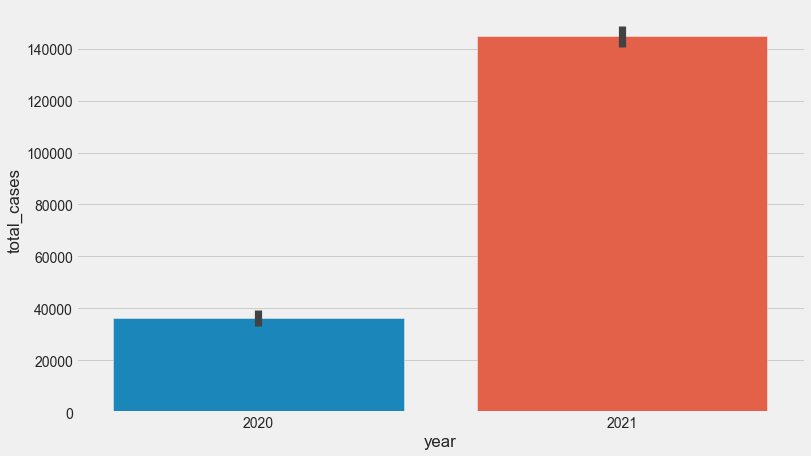

In [69]:
# yearly total cases
g = sns.catplot(x='year', y='total_cases', kind='bar', data=owid_ng)
g.fig.set_figwidth(13)
g.fig.set_figheight(6.5)

2021 has the highest total cases of 140000, while 2020 with over 20000

* Generate the total death for each month using the seaborn lineplot

<AxesSubplot:xlabel='month', ylabel='total_deaths'>

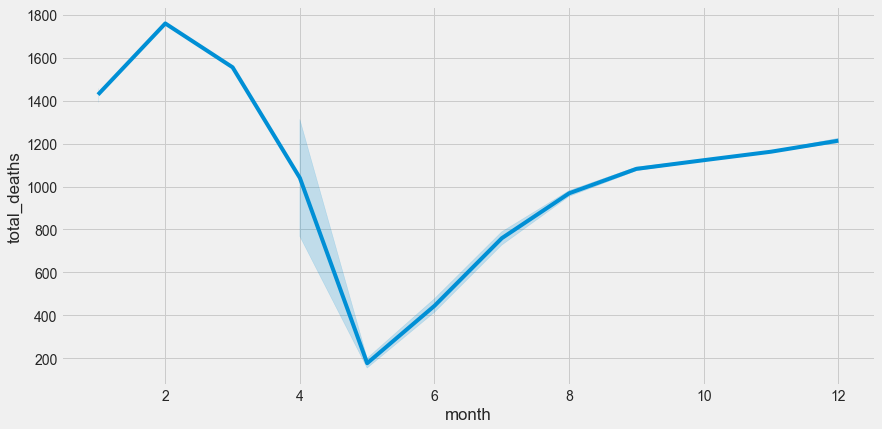

In [71]:
# total death per month
plt.figure(figsize=(13, 6.5))
sns.lineplot(x='month',y='total_deaths', data=owid_ng)

The most recorded death cases is from the second month; February

* Lineplot of daily new cases

<AxesSubplot:xlabel='day', ylabel='new_cases'>

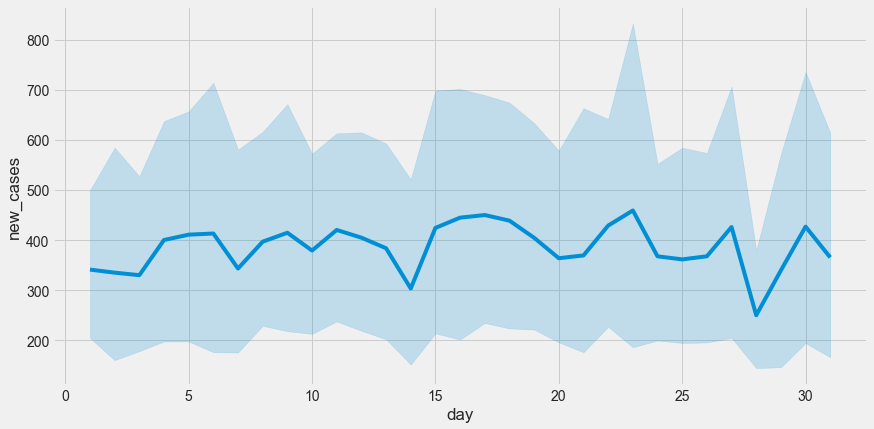

In [72]:
# new cases per day
plt.figure(figsize=(13, 6.5))
sns.lineplot(x='day',y='new_cases', data=owid_ng)

* Number of people vaccinated each month

<AxesSubplot:xlabel='month', ylabel='people_vaccinated'>

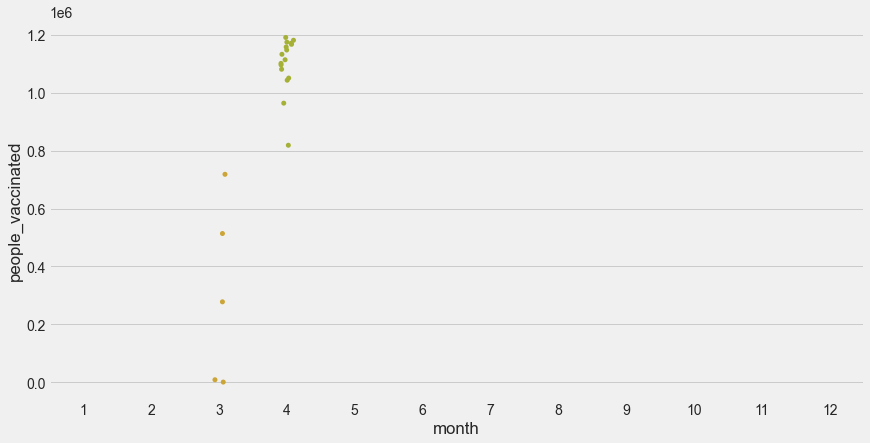

In [73]:
# people vaccinated per month
plt.figure(figsize=(13, 6.5))
sns.stripplot(x=owid_ng['month'],y=owid_ng['people_vaccinated'])

April holds the record of most vaccinated people

* Use stripplot for the total tests in both years

<AxesSubplot:xlabel='year', ylabel='total_tests'>

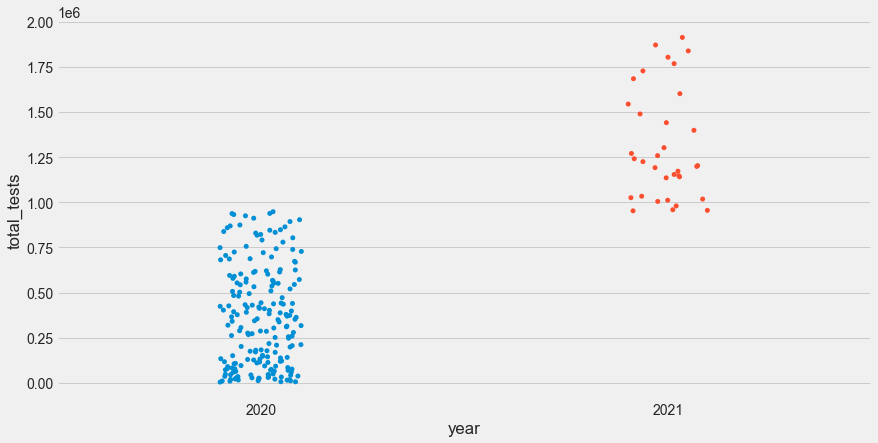

In [74]:
# total tests yearly
plt.figure(figsize=(13, 6.5))
sns.stripplot(x=owid_ng['year'],y=owid_ng['total_tests'])

More COVID tests in 2021